In [ ]:
!pip install fastai --upgrade

In [ ]:
from fastai.vision.all import*

In [ ]:
mild="/content/drive/MyDrive/prep kaggle/Preprocessed/Dataset/Mild_Demented"
vmild="/content/drive/MyDrive/prep kaggle/Preprocessed/Dataset/Very_Mild_Demented"
non ="/content/drive/MyDrive/prep kaggle/Preprocessed/Dataset/Non_Demented"

In [ ]:
data=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2,seed=42)
)

In [ ]:
dls=data.dataloaders("/content/drive/MyDrive/prep kaggle/Preprocessed/Dataset/")

In [ ]:
learn=cnn_learner(dls, resnet34, metrics=[accuracy,error_rate])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

In [ ]:
learn.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.555163,1.004659,0.585031,0.414969,00:47


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.963862,0.703848,0.703720,0.296280,00:41
1,0.599737,0.554339,0.785651,0.214349,00:43
2,0.365066,0.522024,0.813995,0.186005,00:43
3,0.257478,0.506158,0.834367,0.165633,00:41
4,0.233912,0.595666,0.820195,0.179805,00:44
5,0.168174,0.491456,0.868025,0.131975,00:43
6,0.156211,0.441997,0.861825,0.138175,00:51
7,0.132289,0.356798,0.887954,0.112046,00:38
8,0.116303,0.458024,0.867139,0.132861,00:38
9,0.096855,0.346661,0.895926,0.104074,00:37


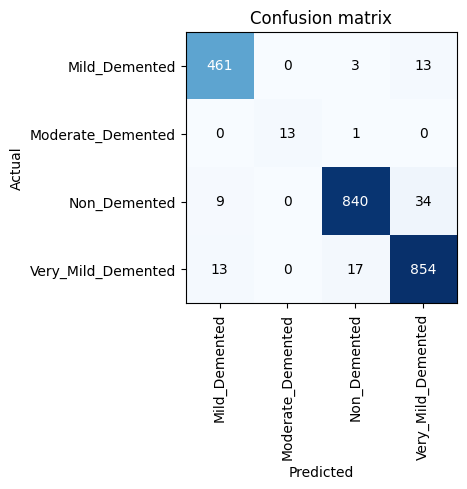

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
preds, targets =learn.get_preds()

In [ ]:
pred_labels = preds.argmax(dim=1)
target_labels=targets

In [ ]:
Class = dls.vocab

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(target_labels, pred_labels, target_names=Class)
print(report)

                    precision    recall  f1-score   support

     Mild_Demented       0.95      0.97      0.96       477
 Moderate_Demented       1.00      0.93      0.96        14
      Non_Demented       0.98      0.95      0.96       883
Very_Mild_Demented       0.95      0.97      0.96       884

          accuracy                           0.96      2258
         macro avg       0.97      0.95      0.96      2258
      weighted avg       0.96      0.96      0.96      2258



In [ ]:
learn.export("restnet34.pkl")

RuntimeError: ignored

In [ ]:
from fastai.text.all import *
learner=load_learner("/content/drive/MyDrive/prep kaggle/restnet34.pkl")


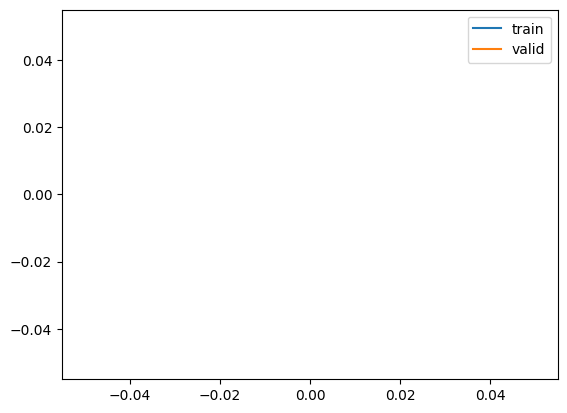

In [ ]:
learn.recorder.plot_loss()

In [ ]:
new_data=""

In [ ]:
preds=learn.predict(new_data)

NameError: ignored

In [ ]:
learnResnet50=cnn_learner(dls, resnet50, metrics=[accuracy,error_rate])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

In [ ]:
learnResnet50.fine_tune(25)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.432038,1.096664,0.587688,0.412312,00:37


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.819624,0.652973,0.721878,0.278122,00:42
1,0.380647,0.616513,0.776351,0.223649,00:42
2,0.217523,0.738791,0.779894,0.220106,00:44
3,0.222338,0.679853,0.807352,0.192648,00:43
4,0.199097,0.577822,0.825952,0.174048,00:43
5,0.186259,0.589554,0.819752,0.180248,00:43
6,0.141063,0.401327,0.870682,0.129318,00:43
7,0.123902,0.374741,0.881754,0.118246,00:44
8,0.092454,0.435328,0.879539,0.120461,00:45
9,0.082886,0.348882,0.898140,0.101860,00:45


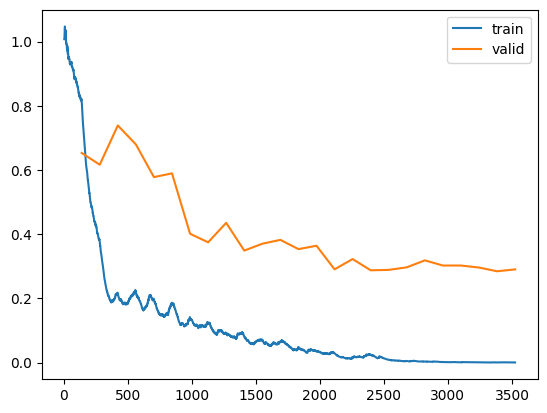

In [ ]:
learnResnet50.recorder.plot_loss()

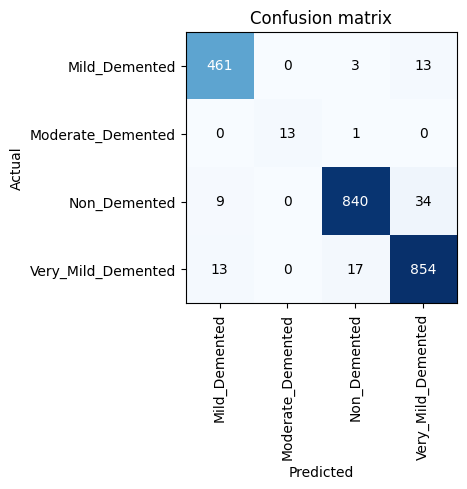

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
preds, targets =learnResnet50.get_preds()

In [ ]:
pred_labels = preds.argmax(dim=1)
target_labels=targets

In [ ]:
Class=dls.vocab

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(target_labels, pred_labels, target_names=Class)
print(report)

                    precision    recall  f1-score   support

     Mild_Demented       0.92      0.97      0.94       477
 Moderate_Demented       1.00      0.93      0.96        14
      Non_Demented       0.97      0.92      0.94       883
Very_Mild_Demented       0.93      0.95      0.94       884

          accuracy                           0.94      2258
         macro avg       0.95      0.94      0.95      2258
      weighted avg       0.94      0.94      0.94      2258



In [ ]:
learnResnet50.export("restnet50.pkl")

In [ ]:
report =

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import os
import keras
from keras. preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.models import load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow

In [ ]:
from fastai.vision.all import *


In [ ]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_y=parent_label,
                   item_tfms=Resize(224))


In [ ]:
path=Path("/content/drive/MyDrive/prep kaggle/Preprocessed/Dataset/")

In [ ]:
dls = dblock.dataloaders(path)


In [ ]:
model = cnn_learner(dls, vgg19, pretrained=True, metrics=accuracy)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██

SuggestedLRs(valley=0.004365158267319202)

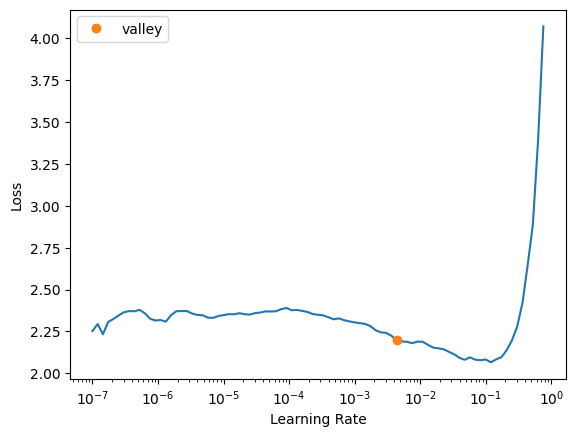

In [ ]:
model.lr_find()


In [ ]:
model.fine_tune(25, base_lr=0.004365158267319202)

epoch,train_loss,valid_loss,accuracy,time
0,0.039521,0.346993,0.915855,01:14


epoch,train_loss,valid_loss,accuracy,time
0,0.036854,0.320398,0.919398,02:47
1,0.032620,0.293772,0.924269,02:47
2,0.035048,0.356550,0.906554,02:48
3,0.060170,0.352040,0.906554,02:49
4,0.075457,0.369049,0.910540,02:47
5,0.089750,0.666929,0.859167,02:47
6,0.077774,0.780186,0.831710,02:47
7,0.076183,0.640697,0.839238,02:48
8,0.074532,0.595101,0.860053,02:48
9,0.059015,0.262400,0.926041,02:48


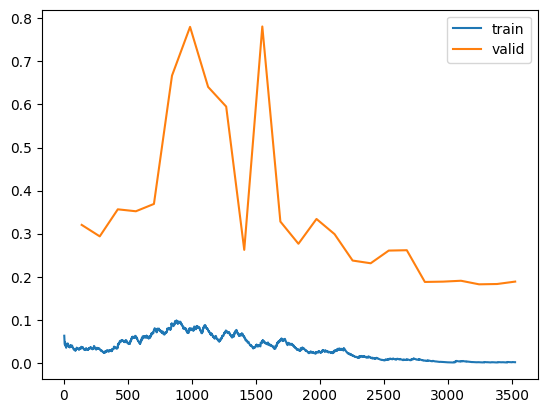

In [ ]:
model.recorder.plot_loss()

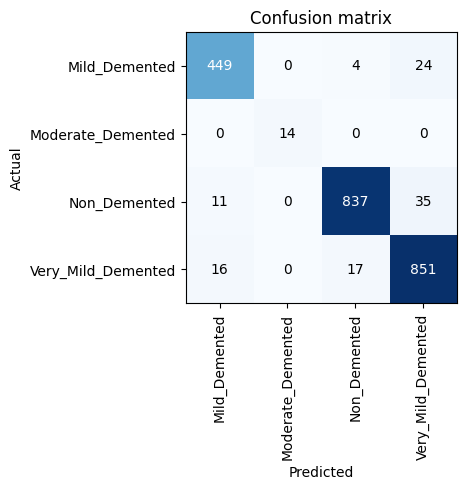

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [ ]:
preds, targets =model.get_preds()

In [ ]:
pred_labels = preds.argmax(dim=1)
target_labels=targets

In [ ]:
Class = dls.vocab

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(target_labels, pred_labels, target_names=Class)
print(report)

                    precision    recall  f1-score   support

     Mild_Demented       0.94      0.94      0.94       477
 Moderate_Demented       1.00      1.00      1.00        14
      Non_Demented       0.98      0.95      0.96       883
Very_Mild_Demented       0.94      0.96      0.95       884

          accuracy                           0.95      2258
         macro avg       0.96      0.96      0.96      2258
      weighted avg       0.95      0.95      0.95      2258



In [ ]:
model.export("VGG19.pkl")

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = "/content/drive/MyDrive/prep kaggle/Preprocessed/Dataset"
Images=[]
labels=[]

for class_folder in os.listdir(data_dir):
  class_path=os.path.join(data_dir,class_folder)
  if os.path.isdir(class_path):
    for file_name in os.listdir(class_path):
      Images.append(os.path.join(class_path,file_name))
      labels.append(class_folder)

In [ ]:
Train_gen =ImageDataGenerator()
Test_gen= ImageDataGenerator()

In [ ]:
Train_generator = Train_gen.flow_from_dataframe(
    dataframe =pd.DataFrame({'filename': Xtrain, 'label': Ytrain}),
    x_col='filename',
    y_col='label',
    color_mode="grayscale",
    target_size=(128, 128),
    batch_size=32,
    shuffle=True,
    class_mode='categorical')

Found 7904 validated image filenames belonging to 4 classes.


In [ ]:
Test_generator = Test_gen.flow_from_dataframe(
    dataframe =pd.DataFrame({'filename': Xtest, 'label': Ytest}),
    x_col='filename',
    y_col='label',
    color_mode="grayscale",
    target_size=(128, 128),
    batch_size=32,
    shuffle=True,
    class_mode='categorical')

Found 3388 validated image filenames belonging to 4 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


In [ ]:

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(Train_generator, epochs=20)

Epoch 1/20
231/247 [===========================>..] - ETA: 1:39 - loss: 15.8467 - accuracy: 0.4610

KeyboardInterrupt: ignored